In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12


In [21]:
# 1.1
df = pd.read_csv("train.csv")
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
df.head()

Dataset shape: (891, 12)
Column names: ['Id пассажира', 'Выжил', 'класс', 'Имя', 'Гендер', 'Возраст', '# братьев и сестер / супругов на борту', '# родителей/детей на борту', '\tНомер билета', 'Стоимость проезда пассажира', 'Номер каюты', 'Порт отправления']


,Id пассажира,Выжил,класс,Имя,Гендер,Возраст,# братьев и сестер / супругов на борту,# родителей/детей на борту,\tНомер билета,Стоимость проезда пассажира,Номер каюты,Порт отправления
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# 1.2
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id пассажира                                0
Выжил                                       0
класс                                       0
Имя                                         0
Гендер                                      0
Возраст                                   177
# братьев и сестер / супругов на борту      0
# родителей/детей на борту                  0
\tНомер билета                              0
Стоимость проезда пассажира                 0
Номер каюты                               687
Порт отправления                            2
dtype: int64


In [23]:
df['Возраст'] = df['Возраст'].fillna(df['Возраст'].median())
df = df.drop('Номер каюты', axis=1)
df['Порт отправления'] = df['Порт отправления'].fillna(df['Порт отправления'].mode()[0])

print("\nAfter handling missing values:")
print(df.isnull().sum())


After handling missing values:
Id пассажира                              0
Выжил                                     0
класс                                     0
Имя                                       0
Гендер                                    0
Возраст                                   0
# братьев и сестер / супругов на борту    0
# родителей/детей на борту                0
\tНомер билета                            0
Стоимость проезда пассажира               0
Порт отправления                          0
dtype: int64


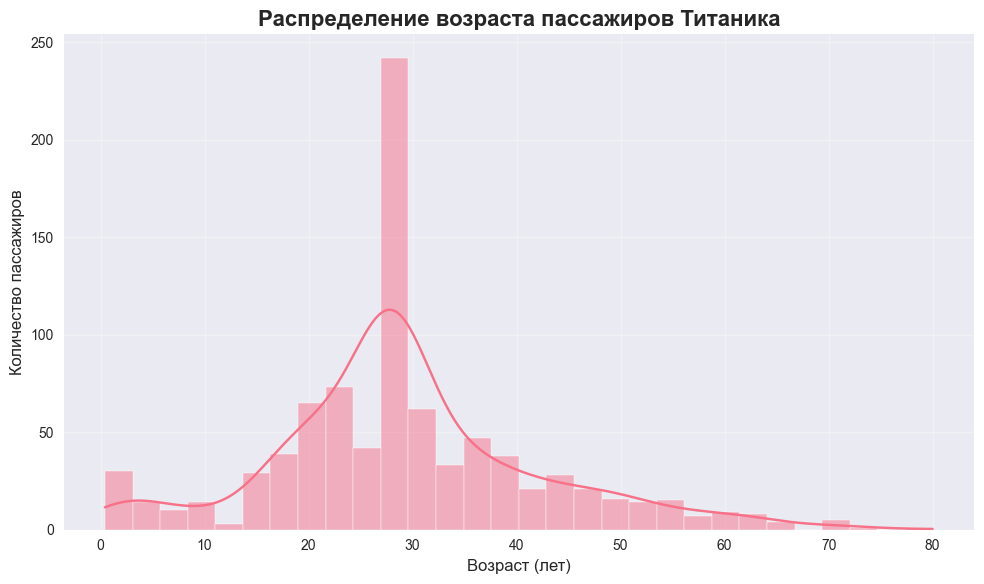

In [24]:
# 2.1
plt.figure(figsize=(10, 6))
sns.histplot(df['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста пассажиров Титаника')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество пассажиров')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

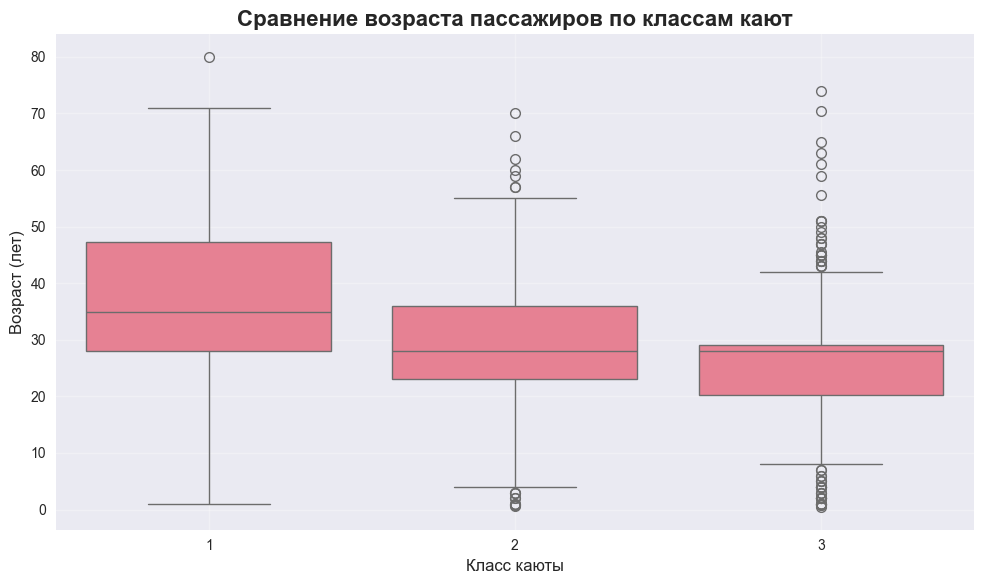

In [25]:
# 2.2
plt.figure(figsize=(10, 6))
sns.boxplot(x='класс', y='Возраст', data=df)
plt.title('Сравнение возраста пассажиров по классам кают')
plt.xlabel('Класс каюты')
plt.ylabel('Возраст (лет)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# 2.3
plt.figure(figsize=(8, 8))
survival_counts = df['Выжил'].value_counts()
labels = ['Не выжили', 'Выжили']
colors = ['#ff6b6b', '#4ecdc4']
explode = (0.1, 0)

<Figure size 800x800 with 0 Axes>

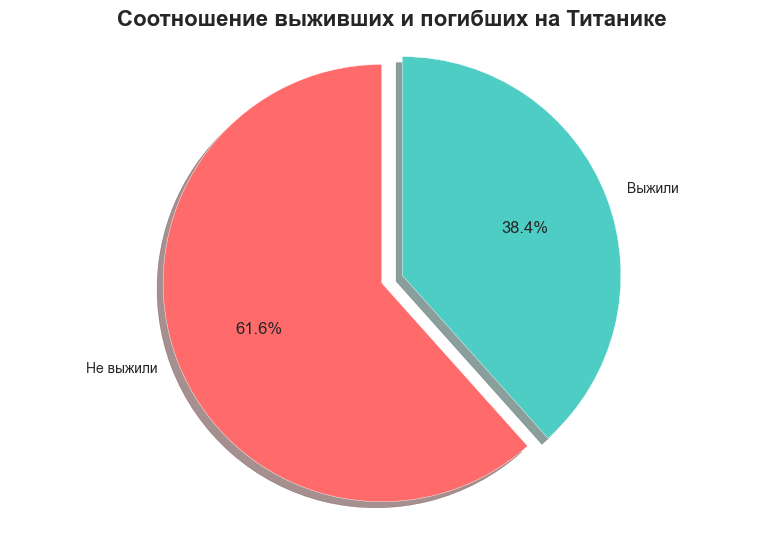

In [27]:
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=explode)
plt.title('Соотношение выживших и погибших на Титанике')
plt.axis('equal')
plt.tight_layout()
plt.show()

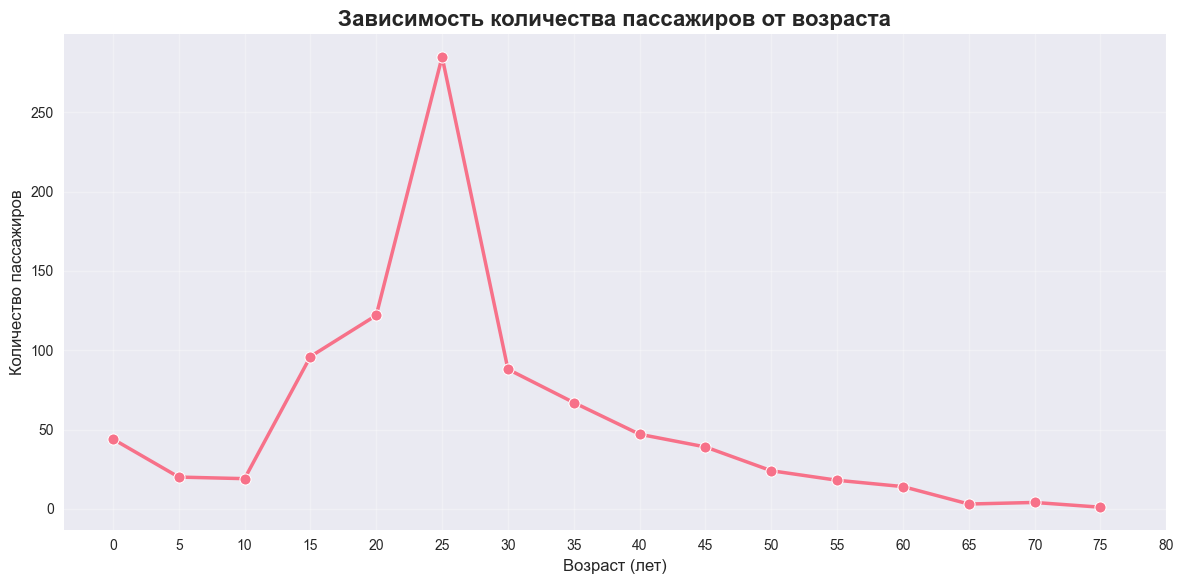

In [28]:
# 2.4
plt.figure(figsize=(12, 6))
age_bins = np.arange(0, df['Возраст'].max() + 5, 5)
age_groups = pd.cut(df['Возраст'], bins=age_bins)
passenger_counts = age_groups.value_counts().sort_index()

sns.lineplot(x=age_bins[:-1], y=passenger_counts.values, marker='o', linewidth=2.5, markersize=8)
plt.title('Зависимость количества пассажиров от возраста')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество пассажиров')
plt.xticks(age_bins)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Создание парного графика...


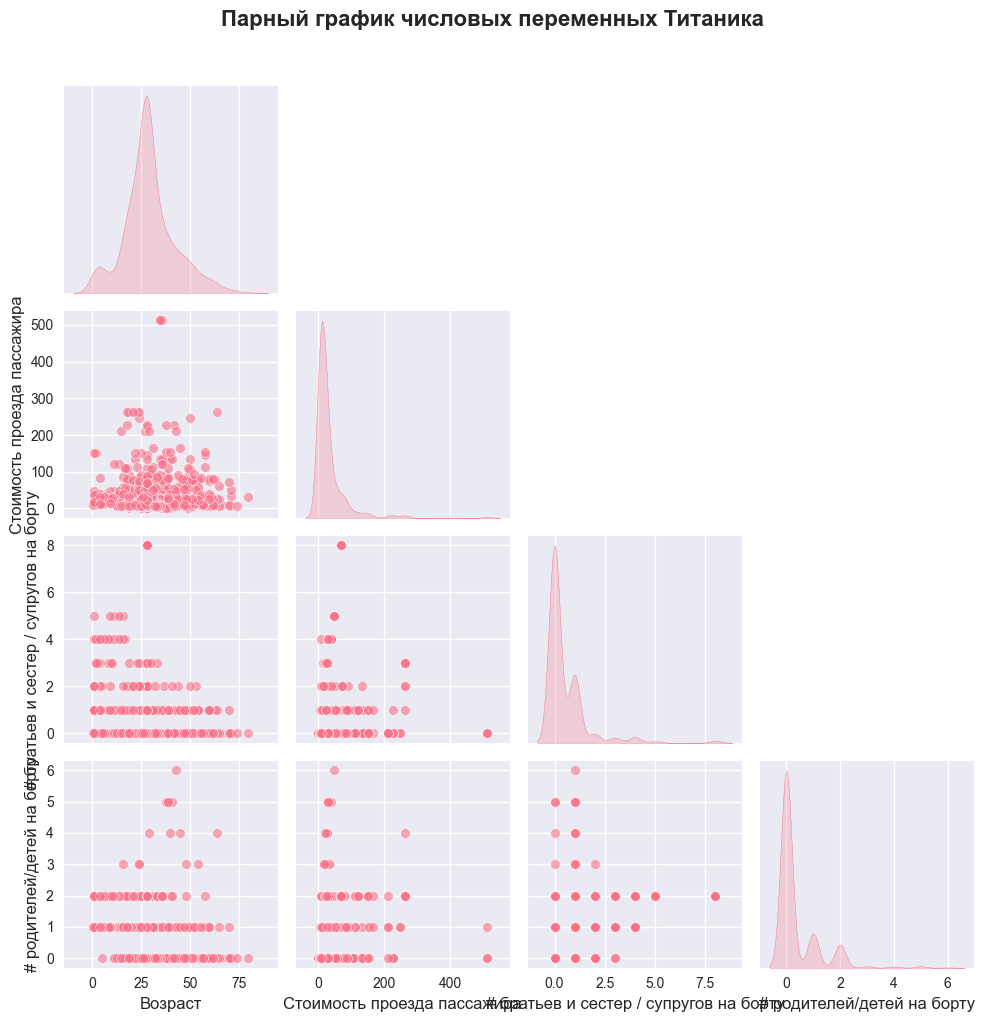

In [30]:
# 3.1
numeric_columns = ['Возраст', 'Стоимость проезда пассажира', '# братьев и сестер / супругов на борту', '# родителей/детей на борту']

print("Создание парного графика...")
pair_grid = sns.pairplot(df[numeric_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
pair_grid.fig.suptitle('Парный график числовых переменных Титаника', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

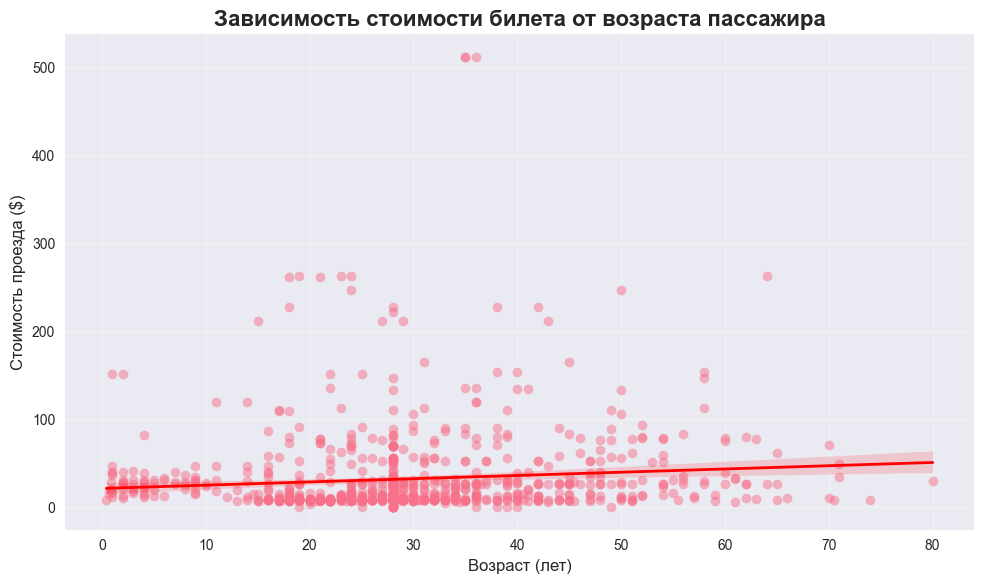

In [31]:

# 3.2
plt.figure(figsize=(10, 6))
sns.regplot(x='Возраст', y='Стоимость проезда пассажира', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})
plt.title('Зависимость стоимости билета от возраста пассажира')
plt.xlabel('Возраст (лет)')
plt.ylabel('Стоимость проезда ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

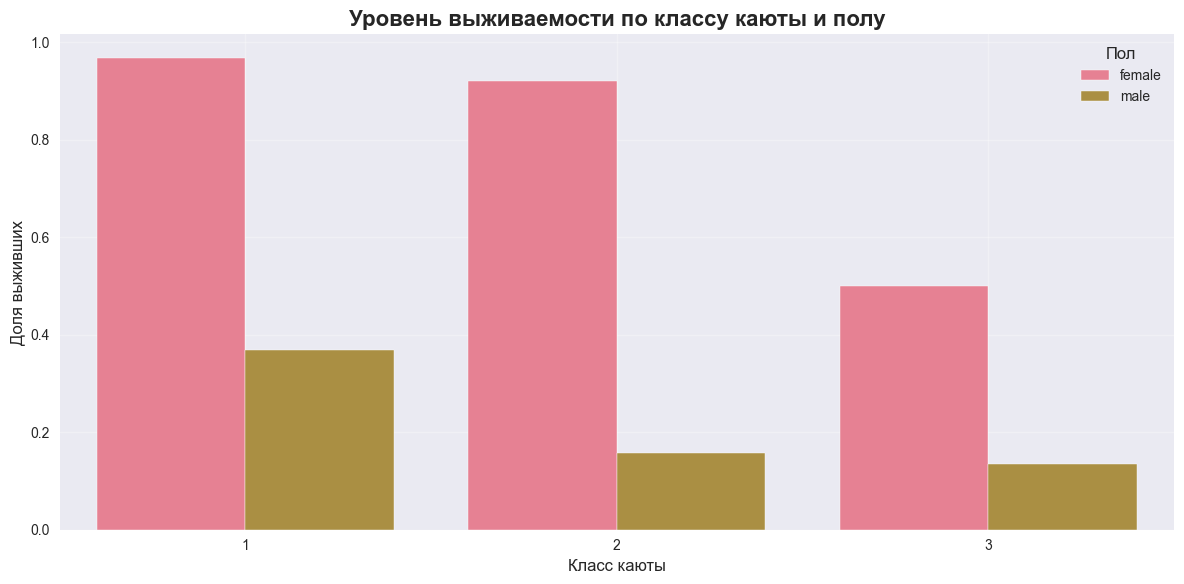

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='класс', y='Выжил', hue='Гендер', data=df, errorbar=None)
plt.title('Уровень выживаемости по классу каюты и полу')
plt.xlabel('Класс каюты')
plt.ylabel('Доля выживших')
plt.legend(title='Пол', loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

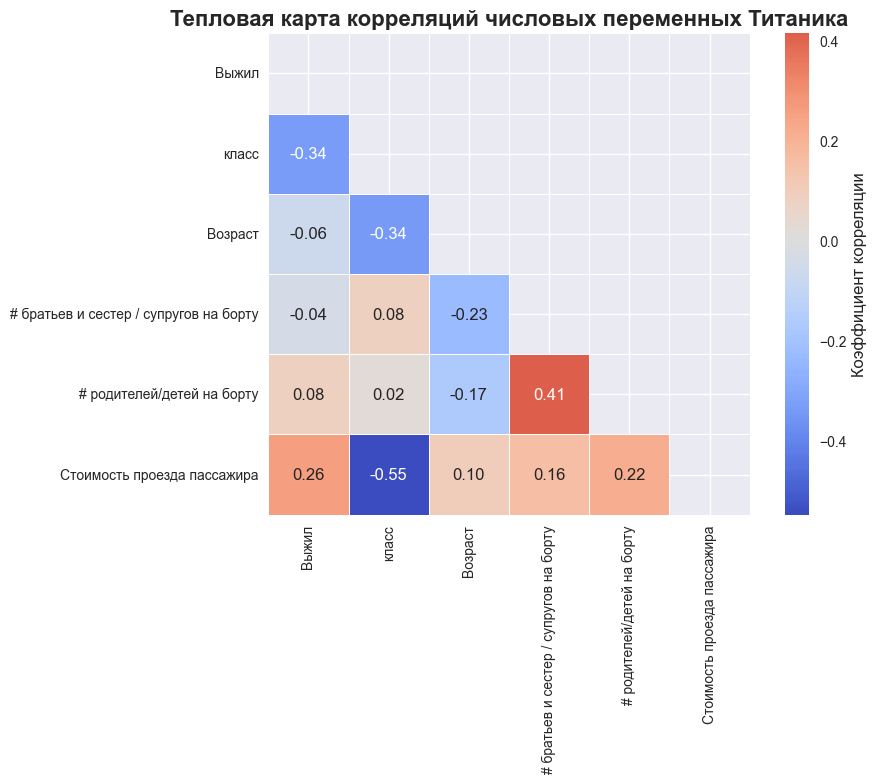

In [33]:
plt.figure(figsize=(10, 8))
numeric_df = df[['Выжил', 'класс', 'Возраст', '# братьев и сестер / супругов на борту',
                 '# родителей/детей на борту', 'Стоимость проезда пассажира']]
correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', mask=mask,
            cbar_kws={'label': 'Коэффициент корреляции'})
plt.title('Тепловая карта корреляций числовых переменных Титаника')
plt.tight_layout()
plt.show()

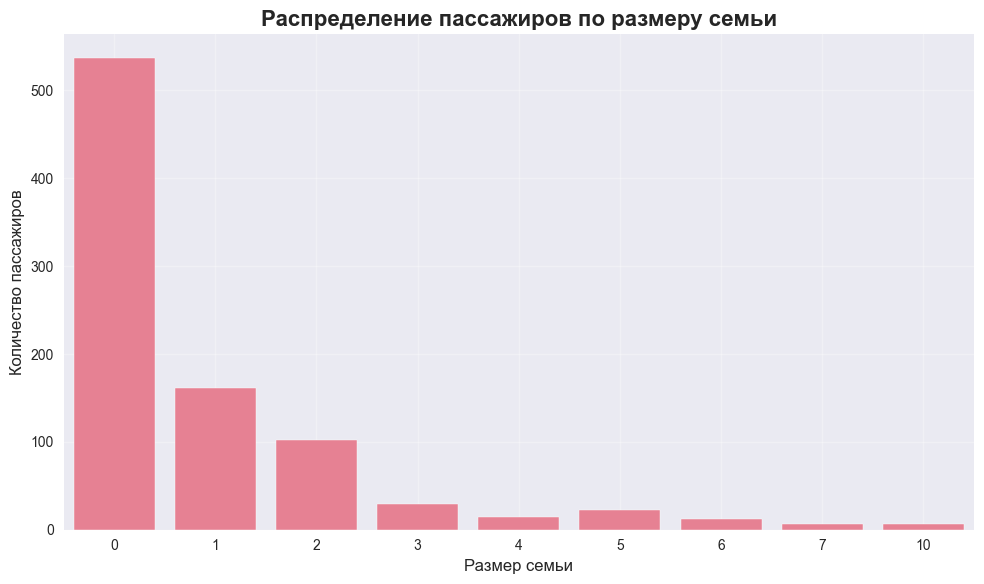

In [34]:
df['Размер семьи'] = df['# братьев и сестер / супругов на борту'] + df['# родителей/детей на борту']

plt.figure(figsize=(10, 6))
sns.countplot(x='Размер семьи', data=df)
plt.title('Распределение пассажиров по размеру семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


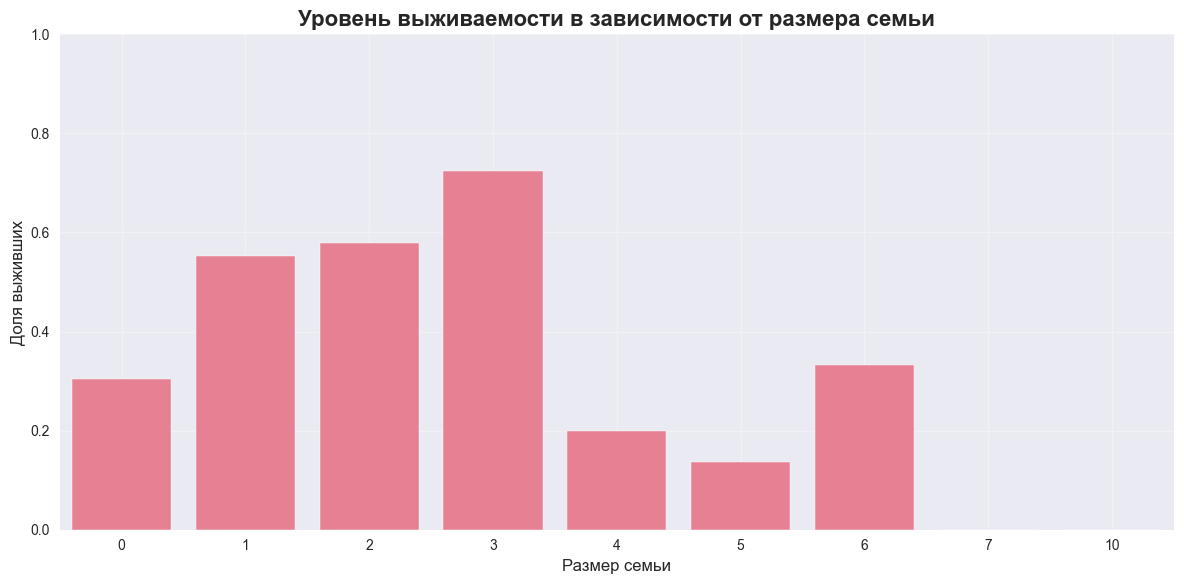

In [35]:
plt.figure(figsize=(12, 6))
family_survival = df.groupby('Размер семьи')['Выжил'].mean().reset_index()
sns.barplot(x='Размер семьи', y='Выжил', data=family_survival, errorbar=None)
plt.title('Уровень выживаемости в зависимости от размера семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Доля выживших')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()